In [24]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
d = {'malignant':1,
     'benign':0}
df = pd.read_csv('C:\\Users\\rhuan\\OneDrive\\Área de Trabalho\\COLAB\\Machine Learning\\breast_cancer.csv')
df['diagnosis'] = df['diagnosis'].map(d)
df

,sample_id,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


##A coluna de diagnosis é remapeada para identificar maligno com valor 1, e benigno com valor 0

In [3]:
y = df['diagnosis'].values
X= df.iloc[:, 1:31].values


jogando os valores da ultima coluna para o array y
e os valores restantes da tabela para a matriz X

In [4]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, shuffle = True, random_state=123, stratify = y)

print((np.bincount(y_train)))


[267 159]


##Randomizando e estratificando a matriz X e o array Y para o treino e o teste


##Estratificando para garantir proporção semelhante de cada classe nas bases de treino/teste

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)
X_train_std

array([[ 1.75784532,  1.77932558,  1.75276896, ...,  1.56681986,
         0.60706868, -0.4222505 ],
       [ 0.10896641,  0.52835109,  0.10270427, ...,  0.13559558,
         0.18978482, -0.85726285],
       [ 0.84980885, -0.02608453,  0.90368624, ...,  2.17049698,
         0.33774603,  0.36863073],
       ...,
       [-0.81348334, -1.35160498, -0.78611385, ..., -0.426241  ,
        -1.33637687, -0.8915768 ],
       [-0.92878955, -0.83211278, -0.89444509, ..., -0.52582457,
        -0.54004632,  1.33108172],
       [ 0.61631376, -0.09830093,  0.71128326, ...,  0.91836873,
        -0.22583656,  1.23699508]])

## Normalização standard da matriz, onde a média se torna 0 e desvio padrão 1

In [33]:
knnmodel = KNeighborsClassifier(n_neighbors=2)
knnmodel.fit(X_train_std, y_train)
ypred = knnmodel.predict(X_test_std)

## Classificação dos dados com knn, método supervisionado que consiste em classificar uma amostra baseada nos valores de seus K-vizinhos mais próximos (por padrão, se utiliza a distancia euclidiana).

In [26]:
conf_matrix = confusion_matrix(y_test, ypred)
tn, fp, fn, tp = confusion_matrix(y_test, ypred).ravel()

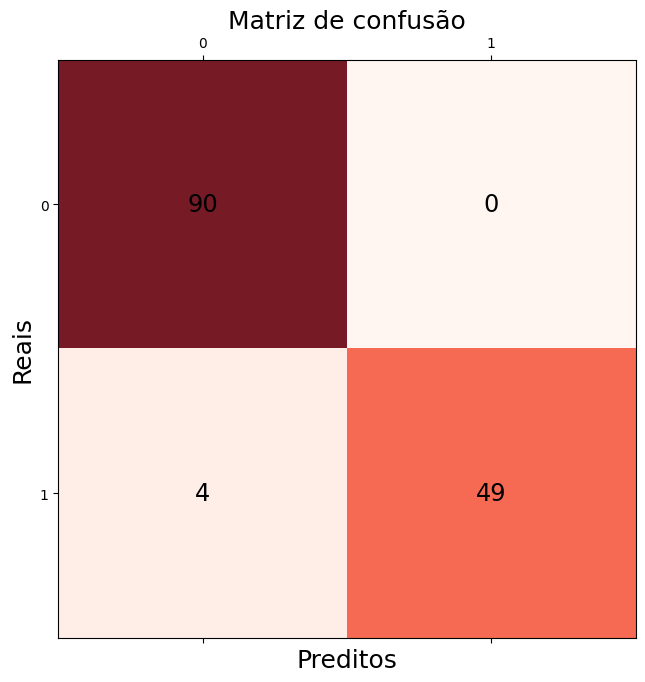

In [32]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Reds, alpha=0.9)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Preditos', fontsize=18)
plt.ylabel('Reais', fontsize=18)
plt.title('Matriz de confusão', fontsize=18)
plt.show()

##Gerada a matriz de confusão, onde vamos avaliar alguns indices de avaliação da qualidade do modelo

A matriz possui os seguintes elementos:

• Verdadeiros positivos (VP): Exemplos da classe positiva classificados corretamente.

• Verdadeiros negativos (VN): Exemplos da classe negativa classificados corretamente.

• Falsos positivos (FP): Exemplos da classe positiva classificados de maneira incorreta.

• Falsos negativos (FN): Exemplos da classe negativa classificados de maneira incorreta

In [27]:
ac = (tp+tn)/(tp+tn+fp+fn)
ac

0.972027972027972

## Acurácia: De maneira geral, indica a performance do modelo, ou seja, a taxa de acertos do modelo (OLIVA, 2019).

In [28]:
precision = tp/(tp+fp)
precision

1.0

## Precisão: Dentre todas as classificações positivas, a porcentagem que foi classificada correta (OLIVA, 2019).

In [29]:
sens = tp/(tp+fn)
sens

0.9245283018867925

## Sensibilidade: A técnica consiste em avaliar a taxa de verdadeiros positivos em relação a todos os valores positivos esperados (OLIVA, 2019).

In [30]:
f1 = (2*precision*sens)/(precision+sens)
f1

0.9607843137254902

## F1-Score (F1): É calculada a partir de uma média harmônica entre a precisão e a revocação (OLIVA, 2019).

In [31]:
esp = tn/(tn+fp)
esp

1.0

## Especificidade: Indica a quantidade de instancias negativas rotuladas corretamente em relação a todos valores negativos esperados.(OLIVA, 2019).

##De maneira geral, este modelo obteve bons resultados.